# The Bias-Variance Tradeoff


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- Supervised Learning - Under the Hood
    - supervised learning: $y = f(x)$, $f$ is unknown.
    - Goals
        - Find a model $\hat{f}$ that best approximates: $f: \hat{f} \approx f$
        - $\hat{f}$ can be Logistic Regression, Decision Tree, Neural Network,...
        - Discard noise as much as possible
        - **End goal**: $\hat{f}$ should achieve a low predictive error on unseen datasets.
- Difficulties in Approximating $f$
    - Overfitting: $\hat{f}(x)$ fits the training set noise.
    - Underfitting: $\hat{f}$ is not flexible enough to approximate $f$.
- Generalization Error
    - Generalization Error of $\hat{f}$: Does $\hat{f}$ generalize well on unseen data?
    - It can be decomposed as follows:
    $$ \hat{f} = \text{bias}^2 + \text{variance} +\text{irreducible error} $$
    - Bias: error term that tells you, on average, how much $\hat{f} \neq f$.
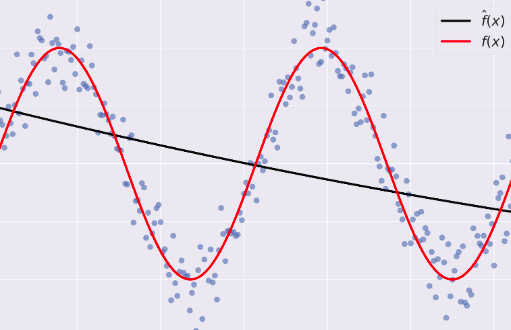
    - Variance: tells you how much $\hat{f}$ is inconsistent over different training sets
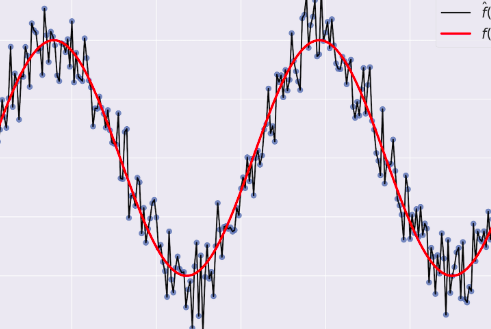
- Model Complexity
    - Model Complexity: sets the flexibility of $\hat{f}$
    - Example: Maximum tree depth, Minimum samples per leaf, ...
- Bias-Variance Tradeoff
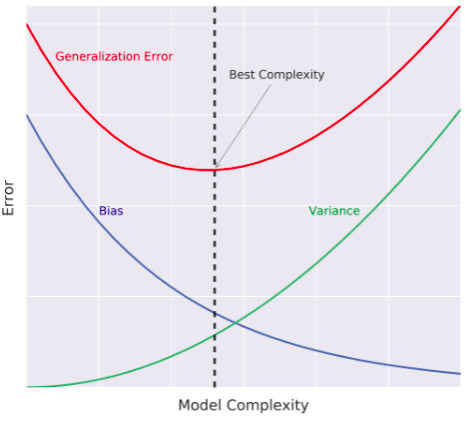
## Diagnose bias and variance problems
- Estimating the Generalization Error
    - How do we estimate the generalization error of a model?
        - Cannot be done directly because:
            - $f$ is unknown
            - usually you only have one dataset
            - noise is unpredictable.
    - Solution
        - Split the data to training and test sets
        - fit $\hat{f}$ to the training set
        - evaluate the error of $\hat{f}$ on the unseen test set
        - generalization error of $\hat{f} \approx$ test set error of $\hat{f}$
- Better model Evaluation with Cross-Validation
    - Test set should not be touched until we are confident about $\hat{f}$'s performance
    - Evaluating $\hat{f}$ on training set: biased estimate, $\hat{f}$ has already seen all training points
    - Solution: Cross-Validation (CV)
        - K-Fold CV
        - Hold-Out CV
- K-Fold CV
    $$\text{CV error} = \dfrac{E_1 + \cdots + E_{10}}{10} $$
- Diagnose Variance Problems
    - If $\hat{f}$ suffers from **high variance**: CV error of $\hat{f} >$ training set error of $\hat{f}$
        - $\hat{f}$ is said to overfit the training set. To remedy overfitting:
            - Decrease model complexity
            - Gather more data, ...
- Diagnose Bias Problems
    - if $\hat{f}$ suffers from high bias: CV error of $\hat{f} \approx$ training set error of $\hat{f} >>$ desired error.
    - $\hat{f}$ is said to underfit the training set. To remedy underfitting:
        - Increase model complexity
        - Gather more relevant features
        
### Instantiate the model
In the following set of exercises, you'll diagnose the bias and variance problems of a regression tree. The regression tree you'll define in this exercise will be used to predict the mpg consumption of cars from the auto dataset using all available features.



In [4]:
df = pd.read_csv('auto.csv')
df = pd.get_dummies(df)

df.head(2)

,mpg,displ,hp,weight,accel,size,origin_Asia,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,0,1


In [6]:
X = df.drop('mpg', axis='columns')
y = df['mpg']

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Set SEED for reproducibility
SEED = 1

# Split the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

# Instantiate a DecisionTreeRegressor dt
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.26, random_state=SEED)

### Evaluate the 10-fold CV error
In this exercise, you'll evaluate the 10-fold CV Root Mean Squared Error (RMSE) achieved by the regression tree ```dt``` that you instantiated in the previous exercise.

Note that since ```cross_val_score``` has only the option of evaluating the negative MSEs, its output should be multiplied by negative one to obtain the MSEs. The CV RMSE can then be obtained by computing the square root of the average MSE.

In [8]:
from sklearn.model_selection import cross_val_score

# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(dt, X_train, y_train, cv=10, 
                                 scoring='neg_mean_squared_error', n_jobs=-1)

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean()) ** 0.5

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

CV RMSE: 5.14


### Evaluate the training error
You'll now evaluate the training set RMSE achieved by the regression tree dt that you instantiated in a previous exercise.

Note that in scikit-learn, the MSE of a model can be computed as follows:
```python
MSE_model = mean_squared_error(y_true, y_predicted)
```
where we use the function mean_squared_error from the ```metrics``` module and pass it the true labels ```y_true``` as a first argument, and the predicted labels from the model ```y_predicted``` as a second argument.

In [9]:
from sklearn.metrics import mean_squared_error as MSE

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict the labels of the training set
y_pred_train = dt.predict(X_train)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train)) ** 0.5

# Print RMSE_train
print("Train RMSE: {:.2f}".format(RMSE_train))

Train RMSE: 5.15
